In [1]:
import warnings

warnings.filterwarnings("ignore")

import math
import os
import re
import sys
from collections import Counter
from functools import reduce
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from rich import print
from tqdm import tqdm

In [2]:
def plot_mtx(mtx):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.matshow(mtx, cmap=plt.cm.Blues)
    for i in range(mtx.shape[0]):
        for j in range(mtx.shape[1]):
            c = mtx[i, j]
    plt.plot()

In [3]:
def read_file_to_str_li(fp, print_exp=True):
    with open(fp, "r") as f:
        lines = f.read().split("\n")
    if print_exp:
        print(f"Read from {fp}:")
        print(f"First line: {lines[0]} | Last line: {lines[-1]}")
        print("-" * 6)

    return lines


# define the function blocks
def convert_to_int(input_str):
    if input_str == "" or input_str == " ":
        return None
    return int(input_str)


def convert_to_str(input_str):
    return str(input_str)


# map the inputs to the function blocks
converts = {
    "i": convert_to_int,
    "s": convert_to_str,
}


def convert_str_li_to_other_li(
    str_li, pattern="i", per_letter=False, sep=" ", start_row=0, end_row=None
):
    """Convert a list of string to a list of other types

    pattern: a list of types for one item.
        'i' for int, 's' for string
        'si' means: convert the 1st item to string, the rest to integer
        If separated items are more than pattern items,
        use the last one from the parttern.
    if per_letter=True, ignore sep and separate item per letter
    """
    target_str_li = str_li[start_row:end_row]
    # find max item num
    max_item_num = 1
    if per_letter:
        max_item_num = max([len(s) for s in target_str_li])
    else:
        max_item_num = max([len(s.split(sep)) for s in target_str_li])

    # extend the pattern to the max itme num
    pattern = (
        pattern + f"{pattern[-1]}" * (max_item_num - len(pattern))
        if max_item_num > len(pattern)
        else pattern
    )

    # convert
    if per_letter:
        return [
            [converts[pattern[idx]](item) for idx, item in enumerate(s)]
            for s in target_str_li
        ]
    else:
        if sep == " ":
            return [
                [converts[pattern[idx]](item) for idx, item in enumerate(s.split())]
                for s in target_str_li
            ]
        else:
            return [
                [converts[pattern[idx]](item) for idx, item in enumerate(s.split(sep))]
                for s in target_str_li
            ]

In [4]:
fp = "input.txt"
lines = read_file_to_str_li(fp)

print("Convert to:")

# head = convert_str_li_to_other_li(
#     lines, pattern="s", per_letter=True, sep=",", start_row=0, end_row=1
# )

# print(f"Head:\n{head}")
# print(f"First line: {head[0]}")
# print(f"Last line: {head[-1]}")

data = convert_str_li_to_other_li(
    lines, pattern="s", per_letter=False, sep=" ", start_row=None, end_row=None
)


print(f"First line: {data[0]}")
print(f"Last line: {data[-1]}")
print("-" * 6)

Read from input.txt:

First line: addx 1 | Last line: noop

------

Convert to:

First line: ['addx', '1']

Last line: ['noop']

------

In [5]:
x = 1
x_hist = []
x_hist.append(x)
for cmd in data:
    if cmd[0] == "noop":
        x_hist.append(x)
    else:
        x_hist.append(x)
        x += int(cmd[1])
        x_hist.append(x)

count = 0
for i in [20, 60, 100, 140, 180, 220]:
    count += x_hist[i - 1] * i

print(f"Answer to Q1: {count}")

Answer to Q1: 13060

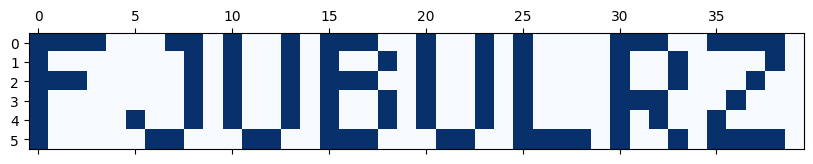

In [6]:
screen = np.zeros((6, 40))

for row in range(6):
    for col in range(40):
        pos = 40 * row + col
        cycle = pos + 1
        sprite_pos = x_hist[cycle - 1]
        if abs(sprite_pos - col) < 2:
            screen[row, col] = 1
plot_mtx(screen)

In [7]:
print("Answer to Q2: FJUBULRZ")

Answer to Q2: FJUBULRZ